<a href="https://colab.research.google.com/github/metsumesquita/ML-Python/blob/main/LDA_topicModeling_pibic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#instalação

In [ ]:
#conteudo que foi utilizado para fazer essa atividade

#https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
#https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

In [ ]:
!pip install gensim

In [ ]:
!pip install spacy

In [ ]:
!pip install --upgrade spacy

In [ ]:
!pip install --upgrade ipython

In [ ]:
!pip install --upgrade  nltk

In [ ]:
!pip install pyldavis gensim

In [ ]:
!pip install pyLDAvis


In [ ]:
!pip install pyLDAvis --upgrade

In [ ]:
!pip install "pandas<2.0.0"

  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.1
    Uninstalling pandas-2.1.1:
      Successfully uninstalled pandas-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.16.1 which is incompatible.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
!pip install fastapi kaleido python-multipart uvicorn

#1.importaçao

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import random
import spacy
import nltk
import re
import pickle

In [ ]:
import gensim

In [ ]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:

from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pprint
from pprint import pprint
import gensim.corpora as corpora
from tqdm import tqdm


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#2.carregamento dos dados

In [ ]:
#O Csv que utilizamos
dataset=pd.read_csv('pla.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Endereço de e-mail,Titulo do artigo\n,DOI do artigo,O artigo possui open acess?,keywords,abstract,"Anexe o PDF do artigo, caso possua acesso",Tipo de publicação,Ano de publicação,Idioma,Qual foi o engenho de busca deste artigo ?
0,isadora.00000844511@unicap.br,Map-based spatio-temporal interpolation in veh...,https://dl.acm.org/doi/10.1145/2442942.2442951,Sim,AUSENTE,Interpolation of motion data is a challenging ...,https://drive.google.com/open?id=1vY6FXT-s6rMY...,Conference,2012,Inglês,ACM
1,gabriel.00000844590@unicap.br,Long Gaps Missing IoT Sensors Time Series Data...,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,Sim,"Missing sensor data, missing data imputation, ...",Missing sensor data is a common problem associ...,https://drive.google.com/open?id=1mZG-QdlseNhp...,Journal,2022,Inglês,IEE
2,thais.2018202795@unicap.br,Concurrent Imputation and Prediction on EHR da...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...,sim,"Recurrent Neural Network, Adversarial Training...",Working with electronic health records (EHRs) ...,https://drive.google.com/open?id=1scqtkhpdQxZZ...,Conference,2021,Inglês,PUBMED
3,maria.00000829620@unicap.br,Evaluating the state of the art in missing dat...,https://pubmed.ncbi.nlm.nih.gov/34882223/,Sim,linical laboratory test; machine learning; mis...,Clinical data are increasingly being mined to ...,https://drive.google.com/open?id=1ChmECvqVYd9k...,Journal,2022,Inglês,PUBMED
4,igor.00000829605@unicap.br,"Chang, Y., Rubin, J., Boverman, G., Vij, S., R...",https://www.doi.org/10.22489/CinC.2019.110,Não,AUSENTE,Early prediction of sepsis onset can notify cl...,https://drive.google.com/open?id=1eRihrebH4M6d...,Conference,2020,Inglês,IEE


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Endereço de e-mail                          25 non-null     object
 1   Titulo do artigo
                           25 non-null     object
 2   DOI do artigo                               25 non-null     object
 3   O artigo possui open acess?                 25 non-null     object
 4   keywords                                    25 non-null     object
 5   abstract                                    25 non-null     object
 6   Anexe o PDF do artigo, caso possua acesso   18 non-null     object
 7   Tipo de publicação                          25 non-null     object
 8   Ano de publicação                           25 non-null     int64 
 9   Idioma                                      25 non-null     object
 10  Qual foi o engenho de busca 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(dataset.columns.values)

['Endereço de e-mail' 'Titulo do artigo\n' 'DOI do artigo'
 'O artigo possui open acess?' 'keywords' 'abstract'
 'Anexe o PDF do artigo, caso possua acesso' 'Tipo de publicação'
 'Ano de publicação' 'Idioma' 'Qual foi o engenho de busca deste artigo ?']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#3.limpeza dos dados

In [ ]:
#agora temos o total de 25 artigos
dataset = dataset[dataset['Qual foi o engenho de busca deste artigo ?'] != "PUBMED"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# retirada das colunas indesejadas
dataset =dataset.drop(columns=['Anexe o PDF do artigo, caso possua acesso','O artigo possui open acess?','Idioma','Endereço de e-mail','Titulo do artigo\n'], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,DOI do artigo,keywords,abstract,Tipo de publicação,Ano de publicação,Qual foi o engenho de busca deste artigo ?
0,https://dl.acm.org/doi/10.1145/2442942.2442951,AUSENTE,Interpolation of motion data is a challenging ...,Conference,2012,ACM
1,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,"Missing sensor data, missing data imputation, ...",Missing sensor data is a common problem associ...,Journal,2022,IEE
4,https://www.doi.org/10.22489/CinC.2019.110,AUSENTE,Early prediction of sepsis onset can notify cl...,Conference,2020,IEE
5,https://dl.acm.org/doi/10.1145/3511808.3557654,AUSENTE,Mobility data collected from location-based so...,Conference,2022,ACM
6,https://doi.org/10.1145/3547353.3526952,AUSENTE,"We introduce and analyze a simpler, practicall...",Journal,2022,ACM
8,https://doi.org/10.1145/3503161.3547796,AUSENTE,Multi-person motion capture can be challenging...,Conference,2022,ACM
10,https://arxiv.org/pdf/2108.03220.pdf,"Phasor measurement unit (PMU), synchrophasor d...",This paper presents a fast model-agnostic meth...,Journal,2020,IEE
14,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,"Altai mountains, data reconstruction, deep lea...",Monitoring of lake water level (WL) changes wi...,Journal,2022,IEE
15,https://dl.acm.org/doi/10.1145/3511808.3557334,AUSENTE,"Urban flow imputation, which aims to infer the...",Conference,2022,ACM
17,https://watermark.silverchair.com/bbab489.pdf?...,"missing data imputation, machine learning, cli...",Clinical data are increasingly being mined to ...,Conference,2022,IEE


#4.retirada de pontuações

In [ ]:
import re
#retirada da pontuaçao das frases que estao contidas em cada linha da coluna abstract
dataset['abstract_processed'] = \
dataset['abstract'].map(lambda x: re.sub('[;,.\\!?]', '', x))
# transformaçao de lower case
dataset['abstract_processed'] = \
dataset['abstract_processed'].map(lambda x: x.lower())
dataset['abstract_processed'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    interpolation of motion data is a challenging ...
1    missing sensor data is a common problem associ...
4    early prediction of sepsis onset can notify cl...
5    mobility data collected from location-based so...
6    we introduce and analyze a simpler practically...
Name: abstract_processed, dtype: object

In [ ]:
dataset['abstract_processed'].tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


15    urban flow imputation which aims to infer the ...
17    clinical data are increasingly being mined to ...
20    scientific discoveries and studies about our p...
21    we formulate a new inference task in the domai...
22    multimodal electronic health record (ehr) data...
Name: abstract_processed, dtype: object

In [ ]:
dataset['abstract_processed']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0     interpolation of motion data is a challenging ...
1     missing sensor data is a common problem associ...
4     early prediction of sepsis onset can notify cl...
5     mobility data collected from location-based so...
6     we introduce and analyze a simpler practically...
8     multi-person motion capture can be challenging...
10    this paper presents a fast model-agnostic meth...
14    monitoring of lake water level (wl) changes wi...
15    urban flow imputation which aims to infer the ...
17    clinical data are increasingly being mined to ...
20    scientific discoveries and studies about our p...
21    we formulate a new inference task in the domai...
22    multimodal electronic health record (ehr) data...
Name: abstract_processed, dtype: object

#5.visualizaçao das palavras

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


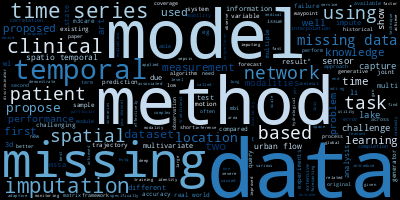

In [ ]:
#quanto maior a palavra mais frequente ela é
#mudança pode ser feitas no mapa de cores para entender melhor
from wordcloud import WordCloud
long_string = ','.join(list(dataset['abstract_processed'].values))
wordcloud = WordCloud(background_color="black", max_words=8000, contour_width=3, contour_color='white', colormap = 'Blues')
wordcloud.generate(long_string)
wordcloud.to_image()

#6.remoção das stopwords e tokearezaçao

In [ ]:
import nltk
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#retiradas das palabras chamadas de stop words que nao sao necessarias e nao possuem relevancia para o nosso estudo
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
nltk.download('stopwords')
#palavras que nao fazem sentido no nosso trabalho
stop_words.extend(['from','in','is','at','on','to','the','this','that','kids','dual','more','use','using','both','whose','why','say','saying','said','me','zip','year','however','my','eg','of','which','as','could','going','go','gone','known','within','with','thing','some','year','used','often','after','also','before','untill','','may','maybe','called','any','second','send','other','per','early','earlier','paper','due','the','one','two','ten','of ten'])

# Função para converter sentenças em palavras
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

# Função para remover stop words
def remove_stopwords(texts):
    return [[word for word in gensim.utils.simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

# Aplicar sent_to_words
data = dataset.abstract_processed.values.tolist()
data_words = list(sent_to_words(data))

# Remover stop words
data_words = remove_stopwords(data_words)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Antes da remoção de stopwords
print("Antes da remoção de stopwords:\n")
print(dataset[['abstract']][:5])  # Imprima as primeiras 5 linhas para exemplo

# Remover stop words
data_words = remove_stopwords(data_words)

# Depois da remoção de stopwords
print("\nDepois da remoção de stopwords:\n")
# Atualizar a coluna 'abstract_processed' com os textos após a remoção de stopwords
dataset['abstract_processed'] = [' '.join(words) for words in data_words]
print(dataset[['abstract_processed']][:5])  # Imprima as primeiras 5 linhas para exemplo


Antes da remoção de stopwords:

                                            abstract
0  Interpolation of motion data is a challenging ...
1  Missing sensor data is a common problem associ...
4  Early prediction of sepsis onset can notify cl...
5  Mobility data collected from location-based so...
6  We introduce and analyze a simpler, practicall...

Depois da remoção de stopwords:

                                  abstract_processed
0  interpolation motion data challenging problem ...
1  missing sensor data common problem associated ...
4  prediction sepsis onset notify clinicians prov...
5  mobility data collected location based social ...
6  introduce analyze simpler practically useful v...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#7.lemmatization

In [ ]:
import spacy
import pandas as pd
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.6.0) was trained with spaCy v3.6.0 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
#Agora podemos novamente utilizar o list comprehension para passar por cada uma das palavras. Dessa vez vamos criar uma grande string, como uma frase, para ser analisada pelo nosso NLP.
doc = nlp(str([palavra for palavra in dataset['abstract_processed']]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV']

def extract_noun_lemmas(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if token.pos_ in allowed_postags]

    # Adiciona uma impressão para verificar os lemas gerados
    print(f"Original: {text}")
    print(f"Lemas: {lemmas}")

    return " ".join(lemmas)

# Substituir a coluna 'abstract_processed' pelos lemas
dataset['abstract_processed'] = dataset['abstract_processed'].apply(extract_noun_lemmas)

# Exibir o dataset
print(dataset[['abstract_processed']])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Original: interpolation motion data challenging problem overlooked researchers gps data low sampling rate define spatio temporal query historical spatio temporal query hstq query receives time returns waypoint containing spatio temporal data moving object particular time respond query given time every need interpolate missing waypoints trajectory linear interpolation li commonly method although grossly inaccurate deal problem propose method map based interpolation mbi method uses routing web services find significant points path waypoints instead road networks typically methods map matching query routing web service analyse returned data find missing waypoints able respond queries sent hstq input time trajectory period combination mbi li mbi li interpolate missing data propose measures comparing performance interpolation method li experimental results realistic trajectories show significant improvement quality accuracy interpolated sampled trajectory data hstq mbi li comparison widely 

---------------------------------------------------------------------------

In [ ]:
# Supondo que dataset seja um DataFrame do pandas
import random

# Função para imprimir exemplos aleatórios
def print_random_examples(data, lemmatization_function, num_examples=5):
    random_indices = random.sample(range(len(data)), num_examples)
    for idx in random_indices:
        try:
            original_text = data.iloc[idx]
            lemmas = lemmatization_function(original_text)
            print(f"Original: {original_text}")
            print(f"Lemas: {lemmas}\n")
        except IndexError:
            print(f"Index {idx} não encontrado no DataFrame.")

# Substitua 'extract_noun_lemmas' pela função real de lematização de substantivos
# Certifique-se de ter essa função definida antes de chamar print_random_examples
# extract_noun_lemmas = sua_funcao_de_lematizacao_de_substantivos

# Usar a função
print_random_examples(dataset['abstract_processed'], extract_noun_lemmas)


Original: urban flow imputation aim infer miss flow location base available flow surround area critically important various smart city relate application urban plan public safety many method propose impute time series datum feasible directly apply urban flow datum follow reason first urban flow complex spatial temporal correlation much hard capture compare time series datum urban flow datum random miss ie miss randomly term time location block miss miss location particular time slot thus difficult exist method work well scenario first time study urban flow imputation problem propose generative free attention base spatial temporal combine mix completion network model short effectively address specifically consist spatial temporal completion network satcnet short spatial temporal mix completion network stmcnet short satcnet compose stack module capture geographical temporal correlation urban flow separately stmcnet design capture complex spatial temporal association jointly historical ur

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#8.DICIONARIO E CORPUS

In [ ]:
import gensim.corpora as corpora
import numpy as np

# O BoW atribui peso igual a todas as palavras dentro de um documento, independentemente de sua importância relativa no corpus.
# Assuming data_words is a list of tokenized documents (one entry per document)

#random seed- para poder ser reproduzido novamente
np.random.seed(1)

#
np.random.shuffle(data_words)

# Create a dicionario
id2word = corpora.Dictionary(data_words)

# criar a corpus
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 3), (8, 3), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 1), (52, 2), (53, 1), (54, 1), (55, 2), (56, 2), (57, 1), (58, 2), (59, 1), (60, 2), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 2), (70, 3), (71, 2), (72, 3), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 1), (80, 1), (81, 1), (82, 3), (83, 1), (84, 1), (85, 1), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1)], [(11, 1), (17, 6), (25, 1), (35, 2), (43, 5), (50, 1), (65, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 2), (99, 1), (100, 1), (101, 1), (102, 1), (103

#9.LDA model training
------------------------------------------
####LDA, being a probabilistic model, involves a certain degree of randomness in its parameter initialization.
#####Setting the random seed ensures that this randomness is controlled and reproducible.

#https://www.analyticsvidhya.com/blog/2021/06/part-2-topic-modeling-and-latent-dirichlet-allocation-lda-using-gensim-and-sklearn/

In [ ]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
#https://medium.com/somos-tera/como-modelar-t%C3%B3picos-atrav%C3%A9s-de-latent-dirichlet-allocation-lda-atrav%C3%A9s-da-biblioteca-gensim-1fa17357ad4b
#https://blogdozouza.wordpress.com/2019/04/01/uma-introducao-a-modelagem-de-topicos-utilizando-analise-semantica-latente-em-python/

In [ ]:
import gensim
from pprint import pprint


seed = 54

# Building LDA model
num_topics = 11
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics,random_state=seed,passes=10)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#10.Coherence Score

In [ ]:
# o valor resultado da variavel coherence_lda quanto mais proximo de 1 ,melhor
#mais coesos e interpretáveis.
from gensim.models import CoherenceModel
#ma métrica comum é a coerência do tópico (c_v), que pode ajudar a avaliar a interpretabilidade dos tópicos.

coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score: 0.5396224436919831


#10.0Print of topics

In [ ]:
# Printing the topics
pprint(lda_model.print_topics())


[(0,
  '0.024*"urban" + 0.021*"temporal" + 0.021*"data" + 0.018*"spatial" + '
  '0.015*"flows" + 0.015*"time" + 0.015*"missing" + 0.012*"models" + '
  '0.012*"flow" + 0.009*"inference"'),
 (1,
  '0.050*"time" + 0.045*"series" + 0.030*"mssa" + 0.020*"model" + '
  '0.020*"temporal" + 0.015*"error" + 0.015*"multivariate" + 0.010*"variant" + '
  '0.010*"analyze" + 0.010*"scaling"'),
 (2,
  '0.036*"data" + 0.022*"method" + 0.020*"missing" + 0.013*"li" + '
  '0.011*"query" + 0.011*"measurements" + 0.009*"temporal" + 0.009*"time" + '
  '0.009*"mbi" + 0.009*"interpolation"'),
 (3,
  '0.037*"data" + 0.033*"clinical" + 0.025*"imputation" + 0.017*"challenge" + '
  '0.017*"missing" + 0.013*"knowledge" + 0.009*"care" + 0.009*"better" + '
  '0.008*"shared" + 0.008*"sectional"'),
 (4,
  '0.038*"missing" + 0.029*"data" + 0.021*"modalities" + 0.015*"clinical" + '
  '0.015*"care" + 0.012*"temporal" + 0.012*"problem" + 0.009*"methods" + '
  '0.009*"real" + 0.009*"model"'),
 (5,
  '0.001*"data" + 0.001*"c

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#10.1.Visualization:

In [ ]:
import pyLDAvis.gensim as gensimvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gensim
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

seed = 54
gensim_seed = 2021  # Gensim usa sua propria seed_radom

# criar modelo LDA
num_topics =6
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=10, random_state=gensim_seed)

# visualizar
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)

# Save the visualization to an HTML file
pyLDAvis.save_html(vis, 'lda_visualization.html')

# Display the visualization
pyLDAvis.display(vis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [ ]:
https://www.kaianalytics.com/post/topic-modelling-in-unigrams#:~:text=The%20Intertopic%20Distance%20Map%20is,larger%20its%20circle%20will%20be.
https://community.alteryx.com/t5/Data-Science/Getting-to-the-Point-with-Topic-Modeling-Part-3-Interpreting-the/ba-p/614992
https://thedigitalskye.com/2020/11/07/topic-modelling-for-absolute-beginners

In [ ]:
  #he size of each of the  topic circles
  #is directly proportional to how many words belong to that topic cluster. So the more frequently a word appears,
  #the larger its circle will be. The circles are plotted using a scaling algorithm
  #so that topic clusters that are closer together have more words in common.



In [ ]:
if  0.547904599432713 >0.5525956767627851 :
  print("topic 13 melhor q  12")
if  0.5525956767627851 >0.5396224436919831:
  print("topic 12 melhor q 11")









In [ ]:
https://www.simplilearn.com/tutorials/statistics-tutorial/what-is-time-series-analysis

In [ ]:
https://timeseriesreasoning.com/contents/time-series-decomposition/